In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
assert torch.cuda.is_available()

In [5]:
assert torch.backends.cudnn.enabled

In [6]:
from IPython.core import page
temp = page.page
page.page = print

%pycat scripts/data_imports.py

page.page=temp

from functools import reduce
import pandas as pd

path = "../data/"
train_path = path + "train-jpg/"
train = pd.read_csv(path + "train_v2.csv")

tags = list(reduce(lambda x, y: x | set(y.split()), train['tags'], set()))

for tag in tags:
    train[tag] = train['tags'].apply(lambda x: tag in x.split())

train = train.drop(labels='tags', axis=1)



In [7]:
%run scripts/data_imports.py

In [8]:
train

,image_name,selective_logging,habitation,haze,agriculture,primary,conventional_mine,slash_burn,road,artisinal_mine,water,cultivation,cloudy,clear,blow_down,partly_cloudy,bare_ground,blooming
0,train_0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,train_1,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False
2,train_2,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,train_3,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,train_4,False,True,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False
5,train_5,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
6,train_6,False,False,False,True,True,False,False,False,False,True,True,False,True,False,False,False,False
7,train_7,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,train_8,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False
9,train_9,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,False,False


In [9]:
override_idxs = False

if override_idxs == True:
    val_count = int(0.2*len(train.index))
    val_idxs = np.random.choice(train.index, size=val_count)
    output = open('val_idxs.pkl', 'wb')
    pickle.dump(val_idxs, output)
    output.close()

pkl_file = open('val_idxs.pkl', 'rb')

val_idxs = pickle.load(pkl_file)

pkl_file.close()

In [10]:
len(val_idxs)/len(train.index)

0.19998023666592554

In [11]:
image_size = 200
architecture = resnext101 # = resnext101_32
batch_size = 5

tfms = tfms_from_model(architecture, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', batch_size, tfms, val_idxs, suffix='.jpg', test_name='test-jpg')

In [12]:
learn = ConvLearner.pretrained(architecture, data, precompute=True)

In [13]:
learn.lr_find()

 82%|████████▏ | 5446/6629 [00:21<00:04, 258.20it/s, loss=0.53] 

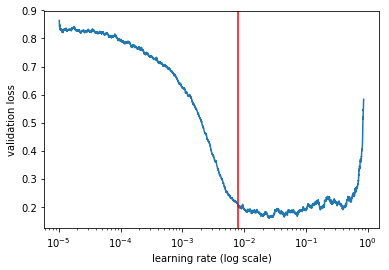

In [14]:
import matplotlib.pyplot as plt
learning_rate=8e-3
learn.sched.plot()
plt.axvline(x=learning_rate, color="red")

In [15]:
learn.fit(learning_rate, 9)

epoch      trn_loss   val_loss   <lambda>                       
    0      0.146168   0.121977   0.953796  
    1      0.147672   0.121651   0.953579                       
    2      0.147412   0.117996   0.95487                        
    3      0.13505    0.119466   0.955135                       
    4      0.148121   0.120052   0.954165                       
    5      0.140909   0.115113   0.956033                       
    6      0.140789   0.121404   0.953451                       
    7      0.132172   0.119043   0.955431                       
    8      0.141656   0.120342   0.954574                       


[array([0.12034]), 0.9545735180889763]

In [16]:
learn.precompute = False
learn.lr_find()

 82%|████████▏ | 5415/6629 [05:57<01:20, 15.15it/s, loss=0.437]

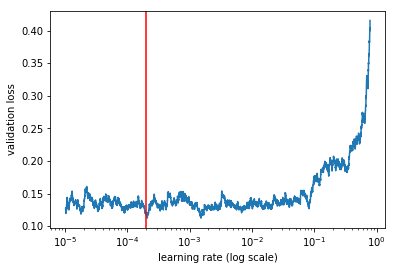

In [17]:
learning_rate=2e-4
learn.sched.plot()
plt.axvline(x=learning_rate, color="red")

In [18]:
learn.fit(learning_rate, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                      
    0      0.133058   0.122545   0.954509  
    1      0.132923   0.119395   0.955247                      
    2      0.139424   0.118316   0.955471                      


[array([0.11832]), 0.9554714647840054]

In [19]:
learn.save('lastlayer')

In [20]:
learn.load('lastlayer')

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

 84%|████████▎ | 5546/6629 [23:06<04:30,  4.00it/s, loss=0.587]

In [ ]:
# 2359 mb

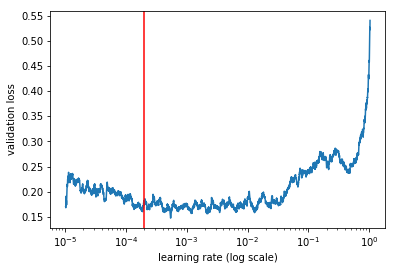

In [24]:
learning_rate=2e-4
learn.sched.plot()
plt.axvline(x=learning_rate, color="red")

In [25]:
lr=np.array([1.5e-6,1.5e-5,1.5e-4])

In [26]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                      
    0      0.178141   0.181625   0.938362  
 69%|██████▉   | 4576/6629 [19:41<08:50,  3.87it/s, loss=0.183]

KeyboardInterrupt: 

In [ ]:
#2404mb (2299mb anaconda)

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.save('layers_all')